<a href="https://colab.research.google.com/github/Rohit-Saswadkar/Airline-Passenger-Referral-Classification/blob/main/Airline_Passenger_Referral_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

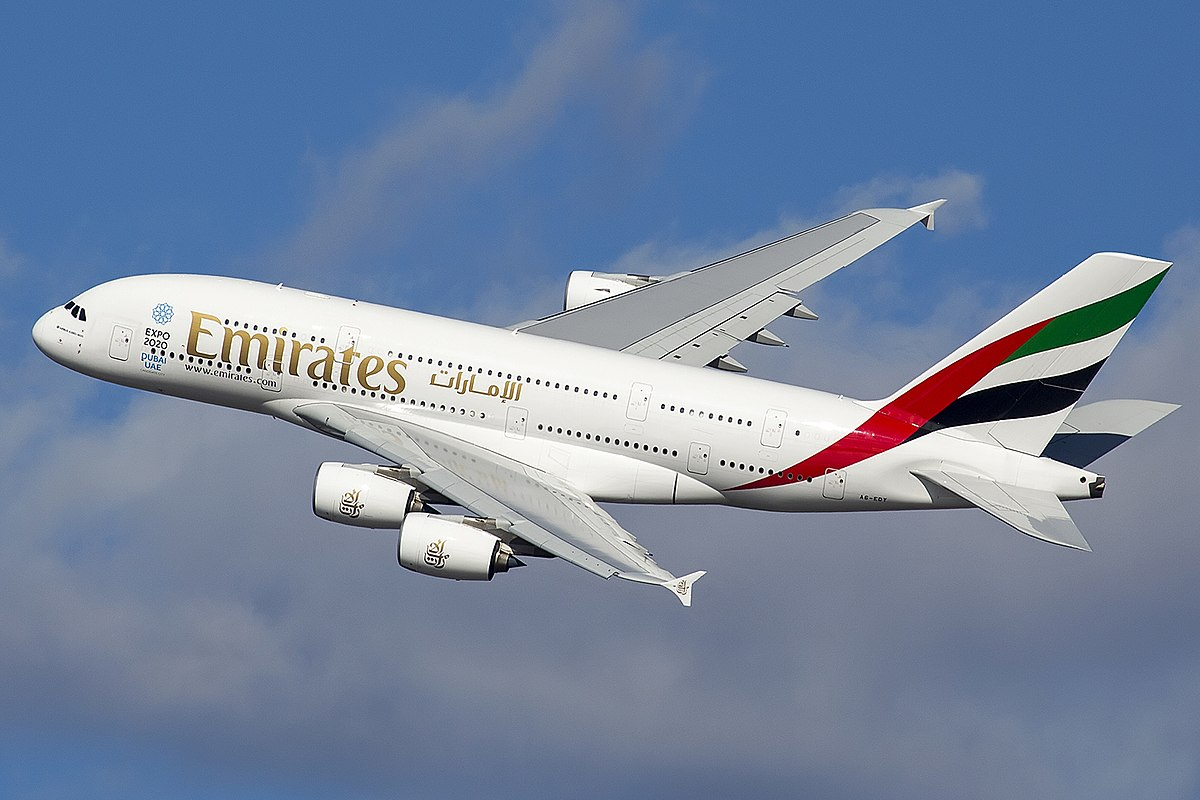

# Problem Discription

Data includes airline reviews from 2006 to 2019 for popular airlines around the world with multiple choice and free text questions. Data is scraped in spring 2019. The main objective is to predict whether passengers will refers the airline to their friends.

Columns to explore-
* airline-Name of the airline.
* Overall - overall points are given to the trip between 10
* author- Author of the trip.
* Reviewdate - Dtae of the Review customer
* Aircraft - Type of the aircraft
* Traveller type- Type of  traveler (eg- business,leidure etc.)
* Flight date-Cabin at the flight date flown
* Cabin service - Rated between 1-5
* groundservice - Rated between 1-5
* Foodbev - Rated between 1-5, entertainment rated between 1-5
ground service rated between
* value for money - rated between 1-5
* recommended - binary target variable

github link- https://github.com/Starfighter-rohit/capstone-3.git


## Importing Data and analyzation

In [383]:
# get important libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_score, accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from xgboost import XGBClassifier
from scipy.stats import boxcox
from imblearn.over_sampling import SMOTE

from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

import os
import pickle


from google.colab import drive
drive.mount('/content/drive')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [384]:
!pip install plotly.express

In [385]:
# extract the data
df=pd.read_excel(r'/content/drive/MyDrive/Data Science Advanced Projects/capstones/capstone 3/10000data_airline_reviews.xlsx')

## Initial data dive

In [386]:
df.shape

(9998, 17)

In [387]:
df.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [388]:
df.tail()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
9993,Lufthansa,9.0,T Herbert,14th February 2018,âœ… Trip Verified | Munich to San Francisco in...,A340-600,Solo Leisure,First Class,Vienna to San Francisco via Munich,February 2018,5.0,5.0,5.0,5.0,4.0,4.0,yes
9994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9995,Lufthansa,9.0,H Dawson,11th February 2018,âœ… Trip Verified | Flew London Heathrow to Fr...,NaN,Couple Leisure,Economy Class,London Heathrow to Frankfurt,February 2018,5.0,5.0,3.0,NaN,4.0,4.0,yes
9996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9997,Lufthansa,9.0,S Tegtmeier,9th February 2018,âœ… Trip Verified | Frankfurt to Madrid. Great...,A321 / A320,Solo Leisure,Economy Class,Frankfurt to Madrid,January 2018,5.0,5.0,5.0,NaN,4.0,5.0,yes


In [389]:
df.describe()

,overall,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money
count,4983.000000,4809.000000,4805.000000,4701.000000,4447.000000,3353.000000,4863.000000
mean,6.053783,3.502599,3.530905,3.524144,3.771531,3.129436,3.473782
std,3.227292,1.298935,1.474362,1.351635,1.265291,1.573557,1.453404
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,2.000000,3.000000,3.000000,1.000000,2.000000
50%,7.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000
75%,9.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
max,10.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [390]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9998 entries, 0 to 9997
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          4999 non-null   object 
 1   overall          4983 non-null   float64
 2   author           4999 non-null   object 
 3   review_date      4999 non-null   object 
 4   customer_review  4999 non-null   object 
 5   aircraft         2299 non-null   object 
 6   traveller_type   3379 non-null   object 
 7   cabin            4866 non-null   object 
 8   route            3377 non-null   object 
 9   date_flown       3370 non-null   object 
 10  seat_comfort     4809 non-null   float64
 11  cabin_service    4805 non-null   float64
 12  food_bev         4701 non-null   float64
 13  entertainment    4447 non-null   float64
 14  ground_service   3353 non-null   float64
 15  value_for_money  4863 non-null   float64
 16  recommended      4866 non-null   object 
dtypes: float64(7),


**Key Findings:**

* **Average Ratings:**  
    * Seat comfort received the highest average rating (6.05), suggesting this was the most satisfying aspect for customers.
    * Ground service (3.77) received a slightly higher rating than other service-related categories (cabin service, food & beverage, entertainment), which all averaged around 3.5.
    * Value for money had the lowest average rating (3.13), indicating customer perception that ticket prices may not have matched the overall experience.
* **Variability in Ratings:** The standard deviation values for each category show a spread in the ratings. This suggests that some passengers were significantly more satisfied than others with various aspects of the service.
* **Minimum Ratings:** Minimum ratings of 1.00 in all categories indicate that some customers were very dissatisfied with certain aspects of their travel experience.

**Possible Inferences:**

* The airline may need to focus on improving cabin service, food & beverage offerings, and in-flight entertainment to enhance customer satisfaction.
* Value perception might be an issue – the airline could explore ways to improve customer perception of value for the ticket price.
* While seat comfort seems to be a strength, it's crucial to maintain standards and avoid potential decline.

**Overall:**

This analysis highlights areas for potential improvement in the airline's services. Further investigation  considering the specific airline, timeframe, and potentially additional data (e.g., customer comments) could provide more actionable insights. This would allow the airline to develop targeted strategies to enhance customer satisfaction and potentially increase customer loyalty.


## Data Processing

The data has lots of null values in numeric and non numeric columns .
So first we convert non numeric to numeric values and then fill them by appropriate values

In [391]:
# renaming data
df.rename(columns =  {'overall':'rating'} , inplace = True)

In [392]:
# Author name and review_date doesnt make sense for building a model so dropped it.
df=df.drop(columns=['author','review_date'],axis=1)
print('columns',df.columns)

columns Index(['airline', 'rating', 'customer_review', 'aircraft', 'traveller_type',
       'cabin', 'route', 'date_flown', 'seat_comfort', 'cabin_service',
       'food_bev', 'entertainment', 'ground_service', 'value_for_money',
       'recommended'],
      dtype='object')


###Transforming data types

**1] Aircraft and Route** - as this have lot of distinct vlues, I am going to use Label encoding which a better choice to transform without higher dimensions

In [393]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

df['route'] = encoder.fit_transform(df['route'])


In [394]:
df['route'].value_counts()

2666    6621
909       10
1732      10
810        8
1919       8
        ... 
616        1
2458       1
101        1
2007       1
1067       1
Name: route, Length: 2667, dtype: int64

In [395]:
df['aircraft'] = df['aircraft'].astype(str)

In [396]:
df['aircraft'] = encoder.fit_transform( df['aircraft'])

**2] Date flown**

In [397]:
df['date_flown'] = pd.to_datetime(df['date_flown'])

df['month'] = df['date_flown'].dt.month
df['year'] = df['date_flown'].dt.year

**3] Customer Review**

**Challenge - Customer review is in string format. My strategy is to convert it in 1 and 0 ( 1: good , 0: bad) as per the sentiment of the review. So I have to use sentiment analysis on it.**

**The customer review has lots of null values. So to fill them my strategy is to check how much null values are going correlated with recommended or not. So I am going to fill that majority ( yes , no) as my sentiment analyser will convert it in 1 or 0**

In [398]:
majority = df.groupby('recommended')['customer_review'].apply( lambda x: x.isnull().sum())

In [399]:
print('The null reviews has majority of recommended as :',majority.idxmax())

The null reviews has majority of recommended as : no


In [400]:
# Customer review has null values fill by 1 using NLP , because if no review is mentioned so we can

df['customer_review']=df['customer_review'].fillna(majority)

In [401]:
# Create a function to classify the sentiment of a text
def classify_sentiment(text):
    # Check if the input is a non-null string
    if isinstance(text, str):
        sia = SentimentIntensityAnalyzer()
        sentiment_scores = sia.polarity_scores(text)
        compound_score = sentiment_scores['compound']

        if compound_score >= 0.05:
            return 1
        elif compound_score <= -0.05:
            return 0
        else:
            return 1
    else:
        # Handle the case where the input is not a string (e.g., NaN or float)
        return 1  # You can adjust this based on your specific use case

# Apply the sentiment classification function to the 'customer_review' column
df['customer_satisfaction'] = df['customer_review'].apply(classify_sentiment)


In [402]:
df['customer_satisfaction'].value_counts()

1    8408
0    1590
Name: customer_satisfaction, dtype: int64

In [403]:
df.drop(columns = ['customer_review','date_flown'] ,axis = 1 , inplace = True)

##Handling Null Values:To handle the null I am going to check the relationship betn that feature with recommended.

In [404]:
# check any null is presented in columns
count_null=df.isnull().sum()
print('\nnull count\n\n',count_null)



null count

 airline                  4999
rating                   5015
aircraft                    0
traveller_type           6619
cabin                    5132
route                       0
seat_comfort             5189
cabin_service            5193
food_bev                 5297
entertainment            5551
ground_service           6645
value_for_money          5135
recommended              5132
month                    6628
year                     6628
customer_satisfaction       0
dtype: int64


1] Rating

In [405]:
ratings = pd.crosstab( df['recommended'] , df['rating'].isna().sum())
ratings

col_0,5015
recommended,
no,1947
yes,2919


In [406]:
# as per above most of the nul ratings are recommended the airline so I am going fill them by median
df['rating'] = df['rating'].fillna(df['rating'].median())

**2] traveller type**

In [407]:
pd.crosstab(df['recommended'] , df['traveller_type'])

traveller_type,Business,Couple Leisure,Family Leisure,Solo Leisure
recommended,,,,
no,299,347,293,487
yes,346,479,317,811


In [408]:
# there are lots of null present , fill them by median and mode. Median does not affected by outliers so its used.
def fill_na(df):
    for col in df.columns:
        df[col]=df[col].fillna(df[col].mode().iloc[0])
    return df
df=fill_na(df)


In [409]:
df.isna().sum()

airline                  0
rating                   0
aircraft                 0
traveller_type           0
cabin                    0
route                    0
seat_comfort             0
cabin_service            0
food_bev                 0
entertainment            0
ground_service           0
value_for_money          0
recommended              0
month                    0
year                     0
customer_satisfaction    0
dtype: int64

**Categories the Data**

In [410]:
numerical_data = ['aircraft','route' ]
categorical_data = [col for col in df.columns if col not in numerical_data]

## **Let's Explore the data:**

###**A] Univariate Analysis**

**1] Barplots for categorical data**

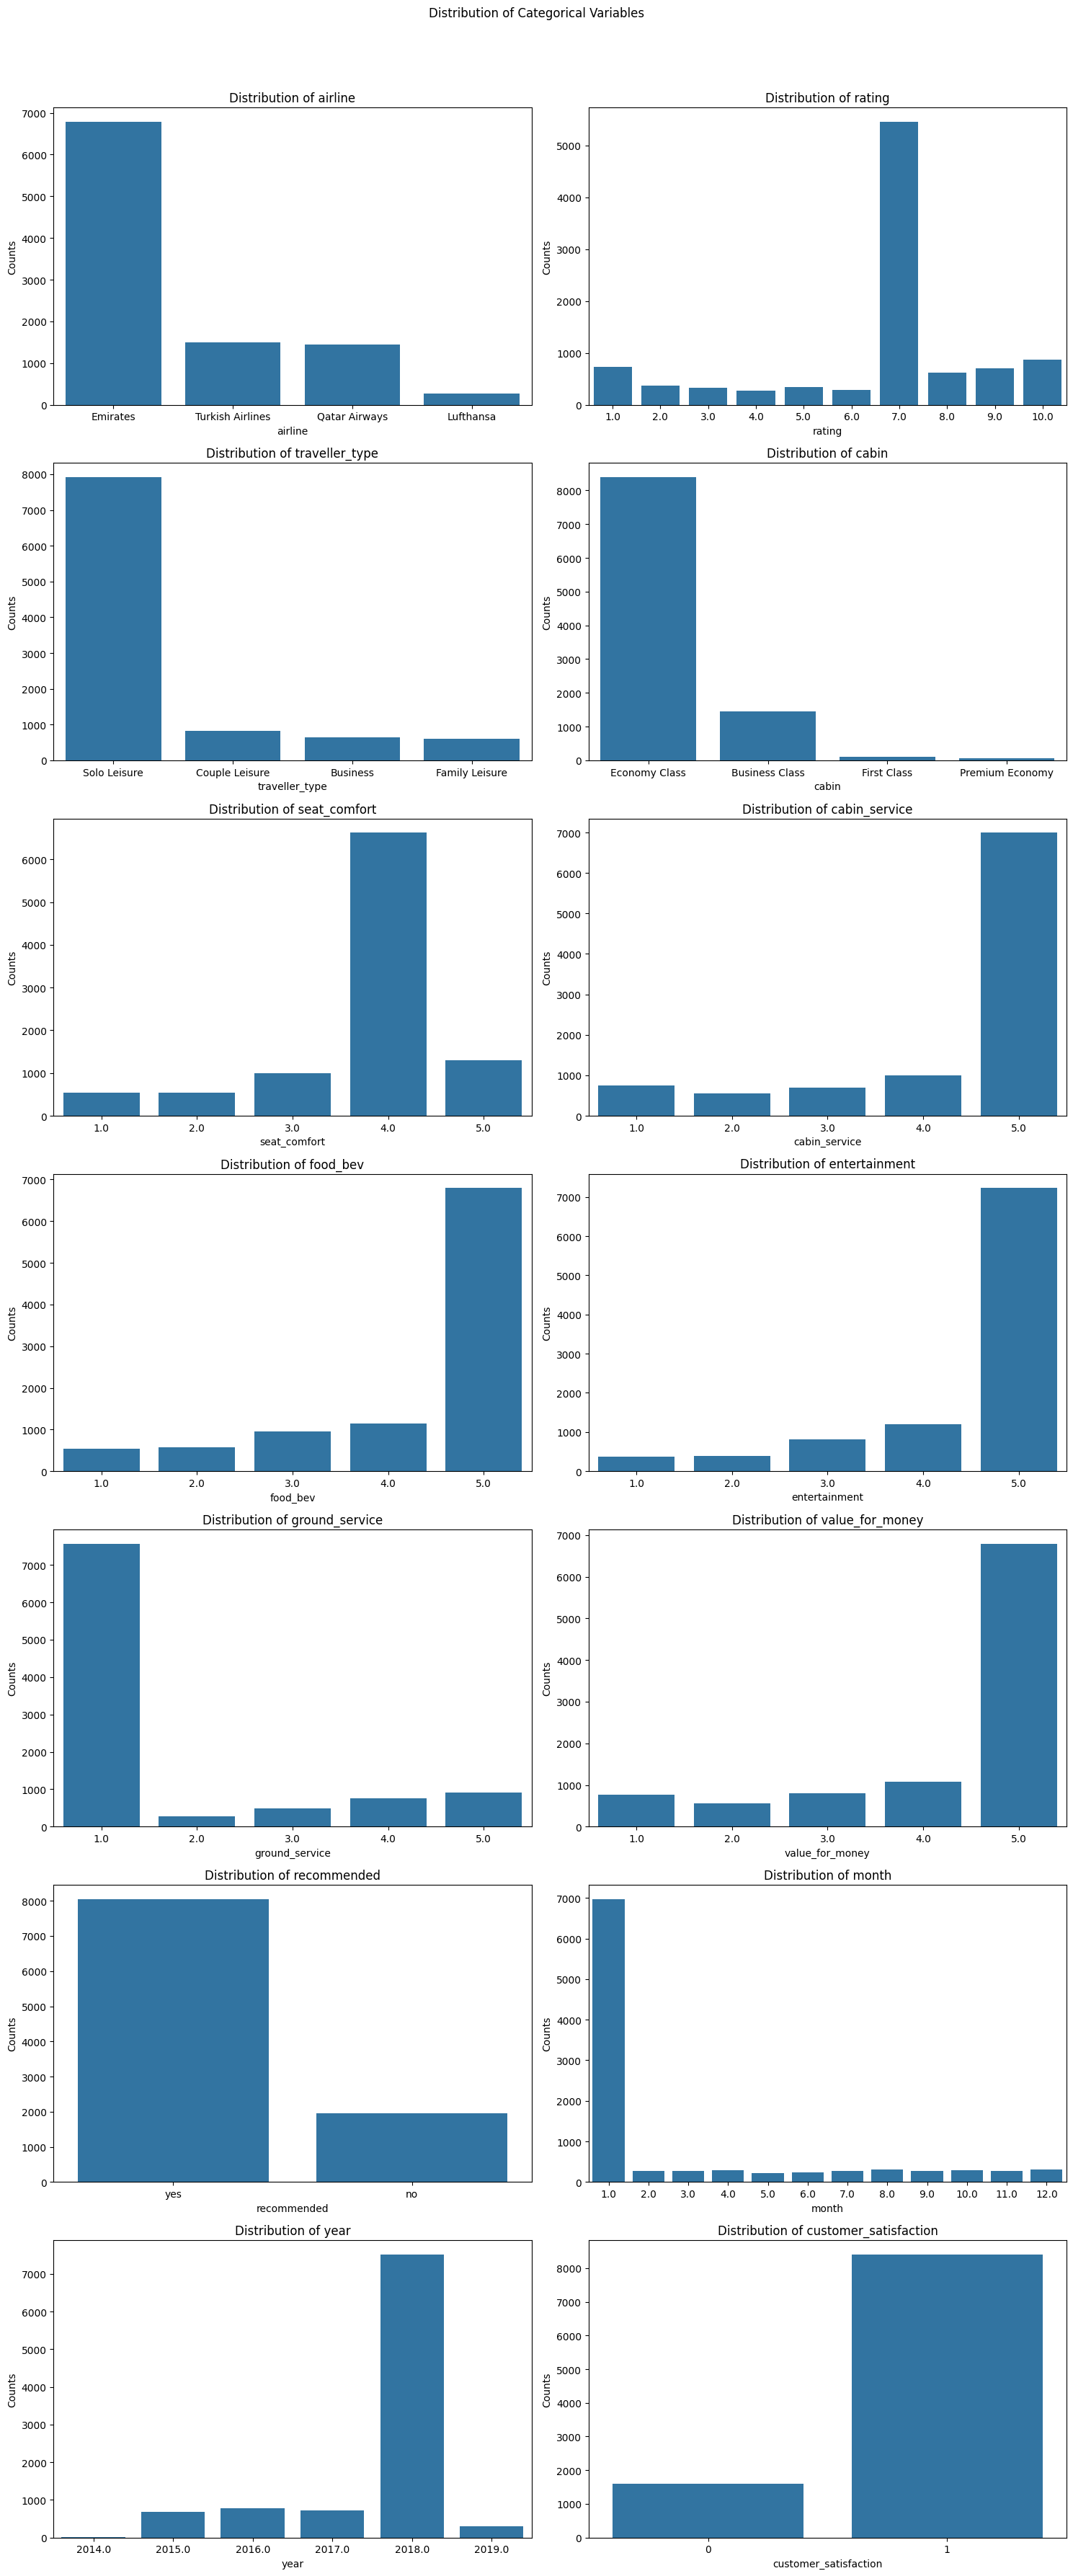

In [339]:
import matplotlib.pyplot as plt
import seaborn as sns


# Define the number of rows and columns for the subplot grid
num_rows = len(categorical_data) // 2
if len(categorical_data) % 2 != 0:
    num_rows += 1

# Set up the subplot grid
fig, axes = plt.subplots(num_rows, 2, figsize=(15, 5 * num_rows))
fig.suptitle('Distribution of Categorical Variables', y=1.02)

# Flatten the axes array if there is only one row
axes = axes.flatten() if num_rows > 1 else [axes]

# Plot each categorical column
for i, col in enumerate(categorical_data):
    sns.barplot(x=df[col].value_counts().index, y=df[col].value_counts(), ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Counts')

# Adjust layout for better visibility
plt.tight_layout()
plt.show()


In [412]:
df.columns

Index(['airline', 'rating', 'aircraft', 'traveller_type', 'cabin', 'route',
       'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money', 'recommended', 'month', 'year',
       'customer_satisfaction'],
      dtype='object')

In [340]:
pd.crosstab( df['recommended'] , df['airline'])

airline,Emirates,Lufthansa,Qatar Airways,Turkish Airlines
recommended,,,,
no,781,142,295,729
yes,6004,135,1150,762


In [413]:
df.groupby('airline')['recommended' , 'rating','cabin_service','seat_comfort','food_bev','ground_service'].mean()

<ipython-input-413-74de0a97e8b5>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('airline')['recommended' , 'rating','cabin_service','seat_comfort','food_bev','ground_service'].mean()
<ipython-input-413-74de0a97e8b5>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('airline')['recommended' , 'rating','cabin_service','seat_comfort','food_bev','ground_service'].mean()


,rating,cabin_service,seat_comfort,food_bev,ground_service
airline,,,,,
Emirates,6.674724,4.543994,3.870155,4.575682,1.355343
Lufthansa,4.895307,3.584838,3.122744,3.436823,2.682310
Qatar Airways,7.484429,4.284429,3.968858,3.905882,2.915571
Turkish Airlines,5.239437,3.297116,3.179745,3.628437,2.002683


**Conclusion:**

Combining the information from the two sets of conclusions:

- **Emirates:**
  - Highest count of recommendations (6004).
  - Lufthansa has the lowest count (135).
  - High overall ratings, particularly in cabin service and food & beverage.
  - Ground service has the lowest rating.

- **Lufthansa:**
  - Lowest count of recommendations (135).
  - Highest count of passengers who did not recommend the airline (142).
  - Lower overall ratings compared to Emirates, with the lowest scores in seat comfort and food & beverage.
  - Ground service has a relatively low rating.

- **Qatar Airways:**
  - Balanced distribution of recommendations and non-recommendations.
  - High overall ratings, especially in cabin service.

- **Turkish Airlines:**
  - Balanced distribution of recommendations and non-recommendations.
  - Moderate ratings across all categories, with the highest scores in food & beverage.

**General Observations:**
- Emirates and Qatar Airways generally have higher ratings compared to Lufthansa and Turkish Airlines.
- Cabin service and food & beverage are significant factors contributing to overall ratings.
- Ground service tends to have lower ratings across airlines, indicating potential areas for improvement in customer service on the ground.

These conclusions provide a comprehensive overview of both the recommendation counts and the individual airline ratings. Emirates and Qatar Airways stand out for their higher overall ratings and balanced recommendation distributions, while Lufthansa shows areas of improvement, especially in terms of recommendations and overall service ratings. Turkish Airlines exhibits a more moderate performance across categories.


**2] Box plots for numerical data**

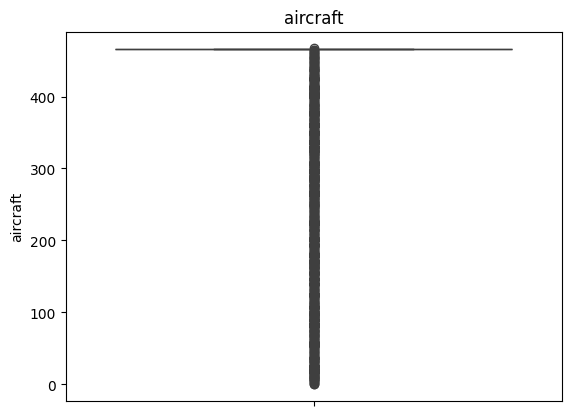

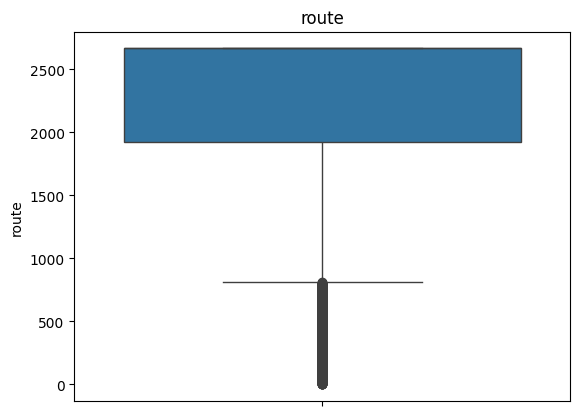

In [341]:
for col in numerical_data:
  sns.boxplot( data = df[col])
  plt.title(col)
  plt.show()

In [342]:
import pandas as pd
import numpy as np

def winsorize_outliers(df, lower_percentile=0.1, upper_percentile=0.9):
    for col in numerical_data:
        lower_limit = df[col].quantile(lower_percentile)
        upper_limit = df[col].quantile(upper_percentile)

        # Winsorizing: Replace values below the lower limit with the lower limit,
        # and values above the upper limit with the upper limit
        df[col] = np.where(df[col] < lower_limit, lower_limit, df[col])
        df[col] = np.where(df[col] > upper_limit, upper_limit, df[col])

    return df

# Assuming df is your DataFrame
df = winsorize_outliers(df)


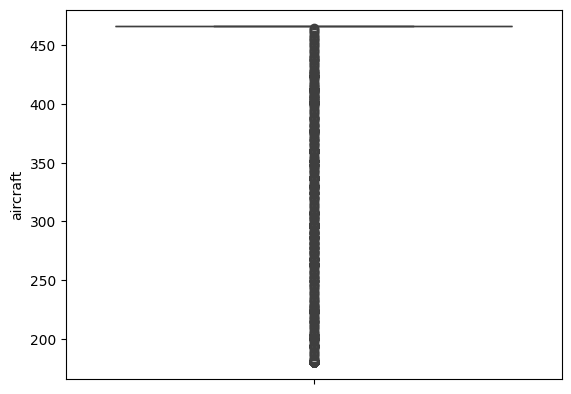

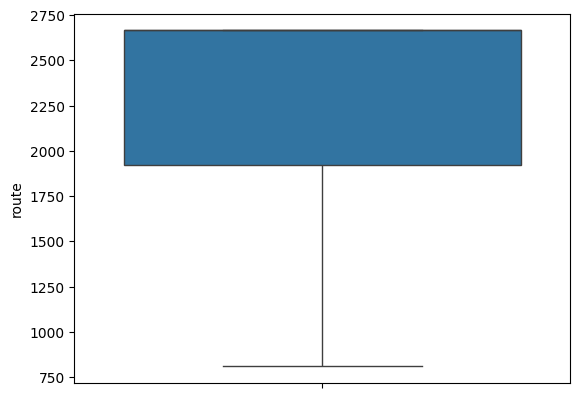

In [343]:
for col in numerical_data:
  sns.boxplot(df[col])
  plt.show()

**Aircraft has too much outliers, but removing all of them can lead to information loss. So I am going to building the model with that and checking performance of the model.**

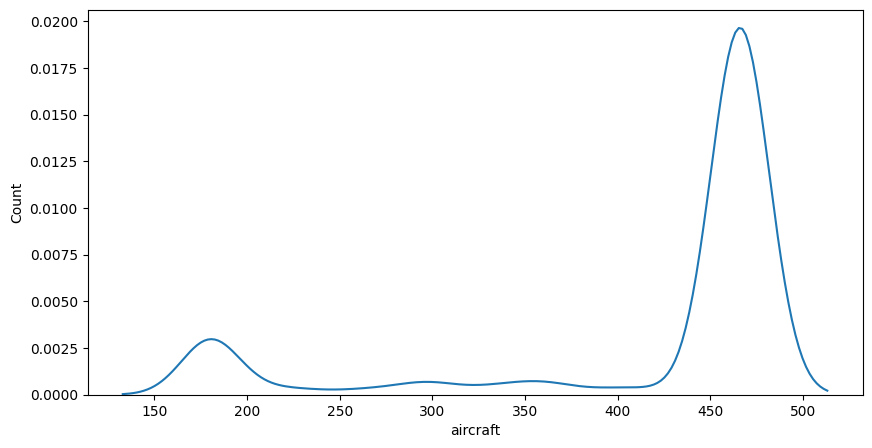

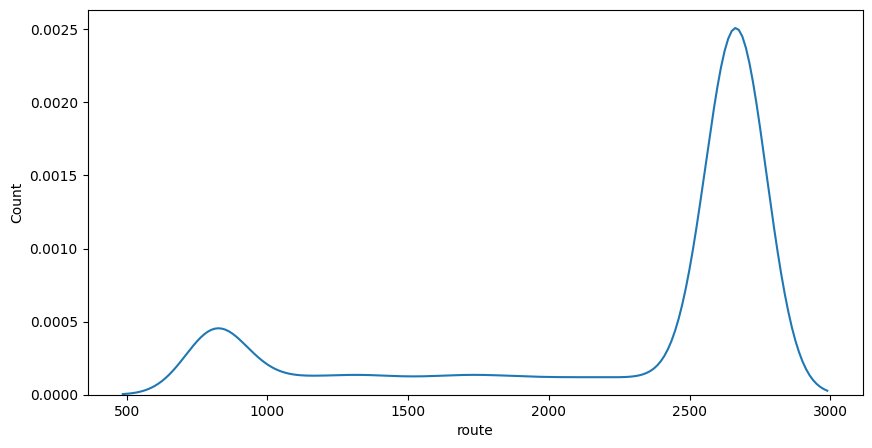

In [344]:

for col in numerical_data:
    plt.figure(figsize=(10,5))
    sns.kdeplot( df[col] )
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

In [345]:
for col in numerical_data:
  df[col]  = np.sqrt(df[col])

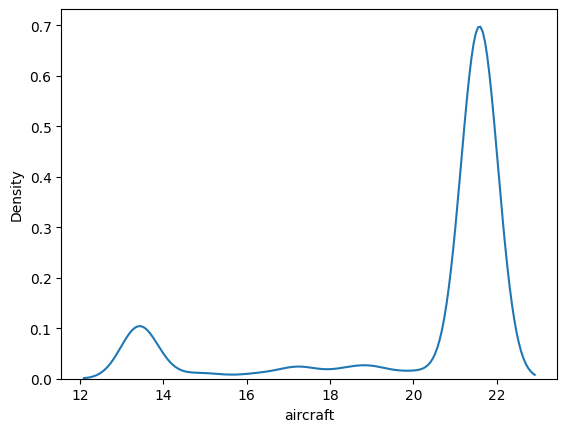

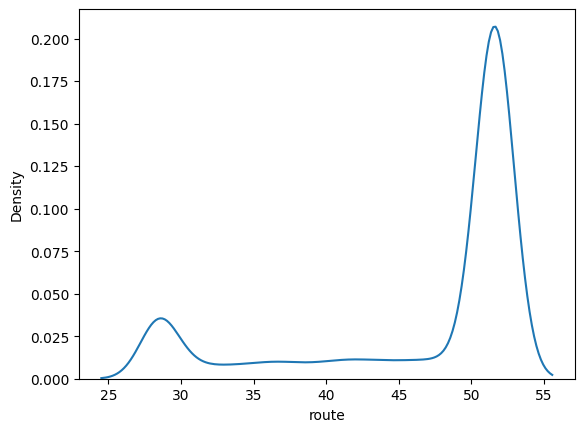

In [346]:
for col in numerical_data:
  sns.kdeplot(x = df[col] , data = df)
  plt.show()

**After Trying lots of transformations such as square root , cube root , boxcox , log transformatin square root gave better results.**

###**B} Bivariate Analysis**

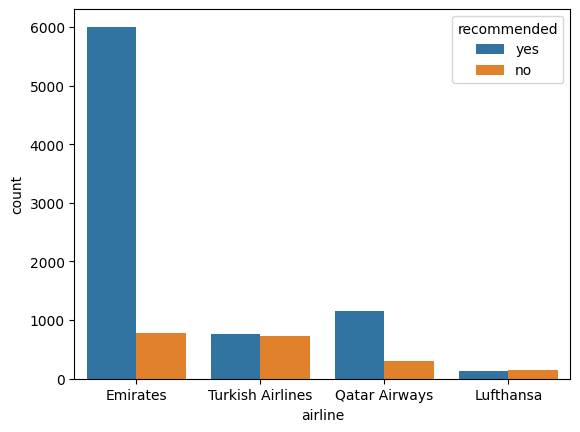

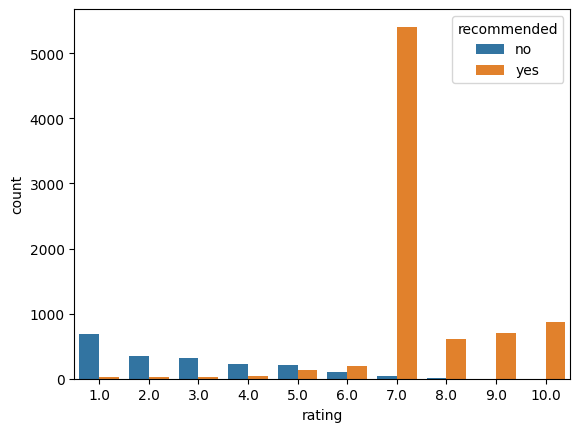

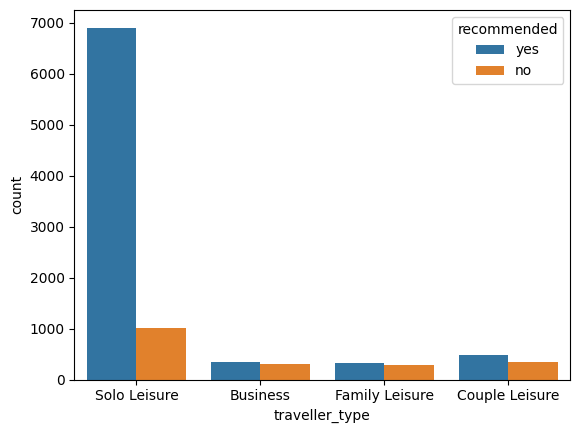

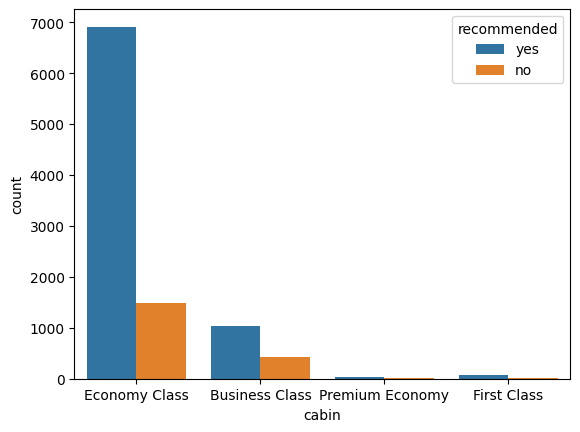

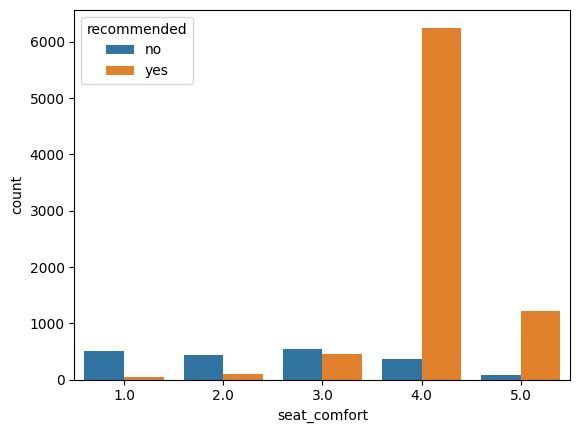

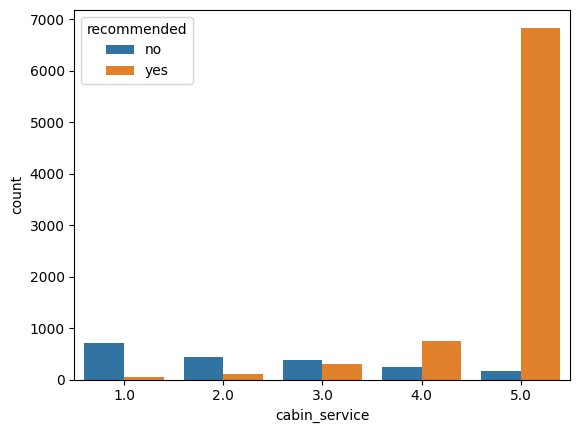

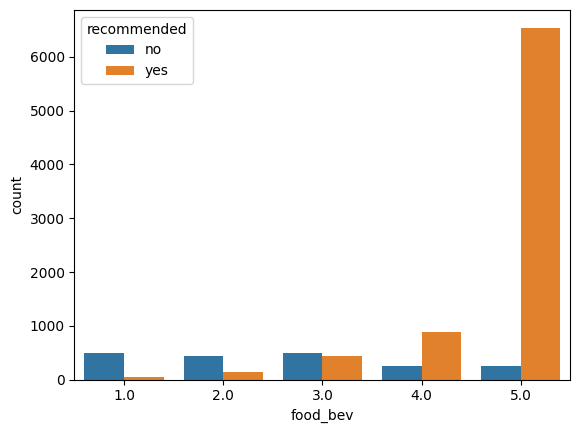

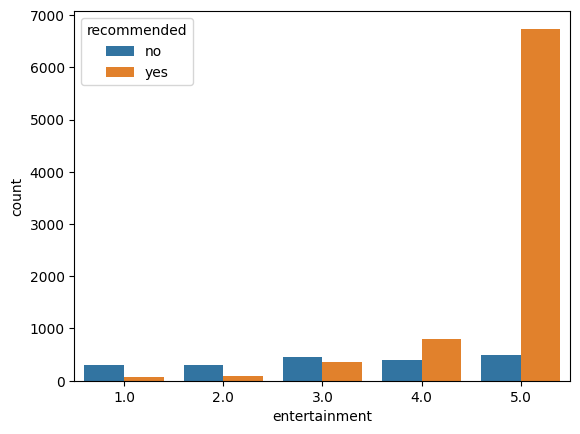

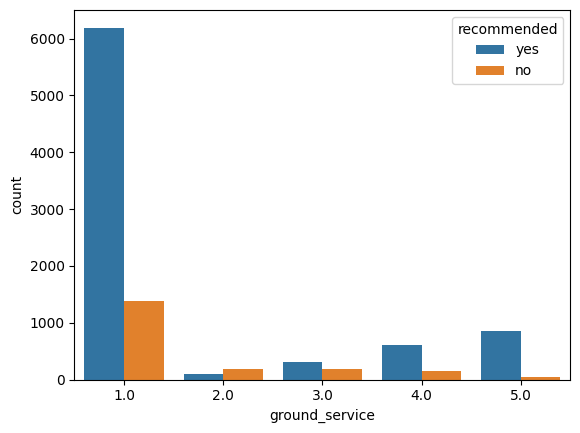

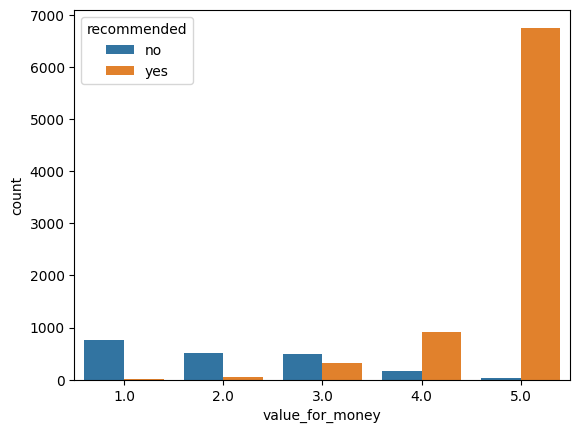

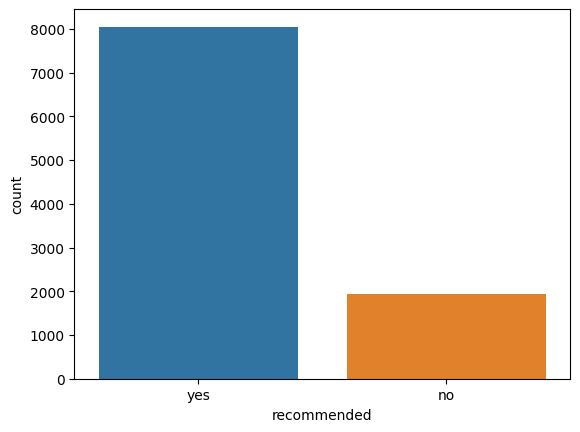

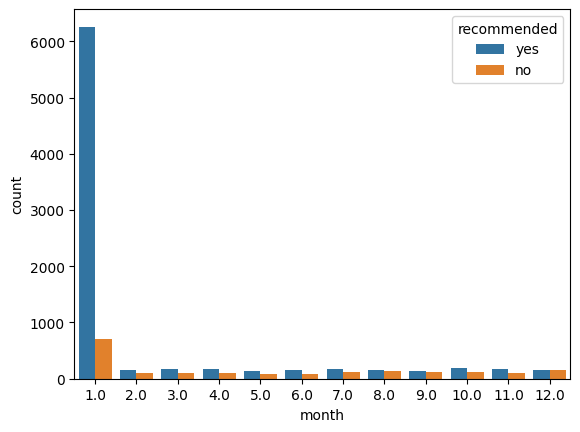

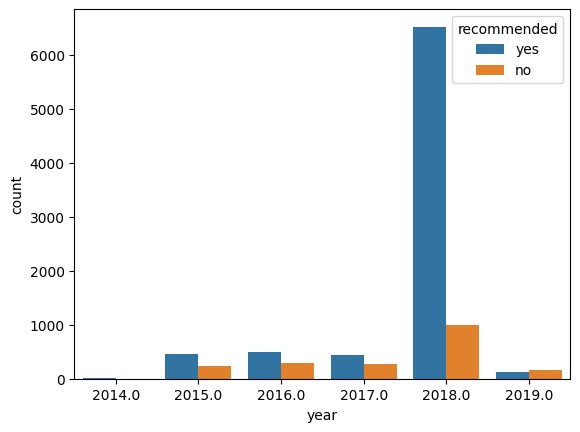

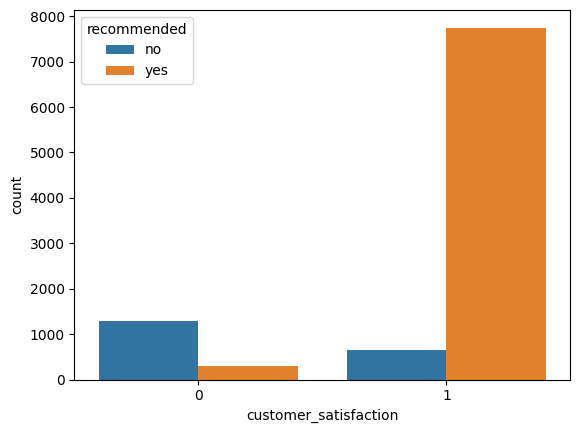

In [347]:
for col in categorical_data:
  sns.countplot( x = col, hue = 'recommended' , data = df)
  plt.show()

###**Multivariate Analysis**

**1] Converting Categorical into numerical format**

In [348]:
df['airline'].value_counts()

Emirates            6785
Turkish Airlines    1491
Qatar Airways       1445
Lufthansa            277
Name: airline, dtype: int64

Lufthansa airline has very less values, so I am going to drop that after one hot encoding to reduce multicolinearity

In [349]:
df = pd.get_dummies( df , columns = ['airline'] )

In [350]:
df = df.drop('airline_Lufthansa' , axis = 1)

In [351]:
# apply label encoding to traveller type , cabin type and target variable recommended
encoder={'traveller_type':{'Solo Leisure':1,'Couple Leisure':2,'Family Leisure':3,'Business':4},'cabin':{'Business Class':4,'First Class':3,'Premium Economy':2,'Economy Class':1},'recommended':{'yes':1,'no':0}}
df=df.replace(encoder)


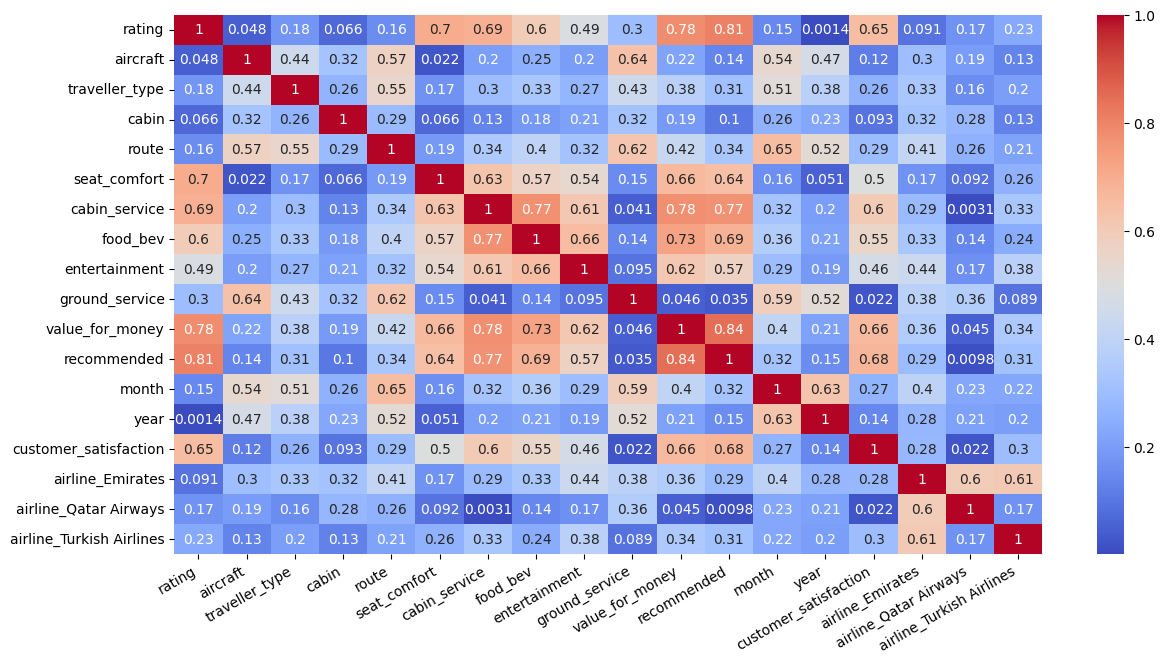

In [352]:
# check newly created columns and drop less frequent columns to avoid multi correaltion
plt.figure(figsize=(14,7))
plot=sns.heatmap(abs(df.corr()),annot=True,cmap='coolwarm')
plot.set_xticklabels(plot.get_xticklabels(),rotation=30,horizontalalignment='right')
plt.show()

#**My Strategy**

**The data has too much multicollinear features but the colinearity values are not too higher. So My strategy is too use multiple classification models who are robust to multicolinearity such as Ensemble and Boosting and Tree based models.**

## **Model Application**

Data transformation for model

In [289]:
# data preperation for model
X=df.drop(columns=['recommended'],axis=1)
y=df['recommended']

###**Multiple classification model application**

In [290]:
# apply classification model
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [291]:
print('xtrain shape before smote',x_train.shape)

xtrain shape before smote (7998, 17)


**As our data has class imbalance so I am applying SMOTE (Synthetic Minority Oversampling Technique)**

In [293]:
smote = SMOTE()

In [294]:
x_train_smote , y_train_smote = smote.fit_resample( x_train , y_train )

In [295]:
print('x train after smote',x_train_smote.shape)

x train after smote (12880, 17)


###**Model Training and Evaluation**

In [287]:
# List of models with hyperparameter grids
models = [
    (RandomForestClassifier(), {'n_estimators': [50, 100, 150]}),
    (DecisionTreeClassifier(), {'max_depth': [3, 5, 7]}),
    (GradientBoostingClassifier(), {'n_estimators': [50, 100, 150], 'learning_rate': [0.1, 0.01]}),
    (LogisticRegression(), {}),
    (GaussianNB(), {}),
    (KNeighborsClassifier(), {'n_neighbors': [3, 5, 7]}),
    (SVC(), {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}),
    (XGBClassifier() , {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 8],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.5] })
]



# Loop through models
for model, param_grid in models:
    # Perform grid search
    grid_search = GridSearchCV(model, param_grid, cv=3)
    grid_search.fit(x_train_smote, y_train_smote)

    # Get best model from grid search
    best_model = grid_search.best_estimator_

    # Make predictions on the test data
    y_pred = best_model.predict(x_test)

    # Get accuracies
    report = classification_report(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)

    # Print best model and metrics
    print(f'\n\n{best_model} MODEL PREDICTIONS')
    print("Best Parameters:", grid_search.best_params_)
    print("Accuracy:", accuracy)
    print('Classification Report\n ', report)




RandomForestClassifier(n_estimators=150) MODEL PREDICTIONS
Best Parameters: {'n_estimators': 150}
Accuracy: 0.966
Classification Report
                precision    recall  f1-score   support

           0       0.88      0.95      0.92       389
           1       0.99      0.97      0.98      1611

    accuracy                           0.97      2000
   macro avg       0.94      0.96      0.95      2000
weighted avg       0.97      0.97      0.97      2000



DecisionTreeClassifier(max_depth=7) MODEL PREDICTIONS
Best Parameters: {'max_depth': 7}
Accuracy: 0.96
Classification Report
                precision    recall  f1-score   support

           0       0.87      0.93      0.90       389
           1       0.98      0.97      0.97      1611

    accuracy                           0.96      2000
   macro avg       0.93      0.95      0.94      2000
weighted avg       0.96      0.96      0.96      2000



GradientBoostingClassifier(n_estimators=50) MODEL PREDICTIONS
Best Paramete

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c



LogisticRegression() MODEL PREDICTIONS
Best Parameters: {}
Accuracy: 0.966
Classification Report
                precision    recall  f1-score   support

           0       0.87      0.97      0.92       389
           1       0.99      0.96      0.98      1611

    accuracy                           0.97      2000
   macro avg       0.93      0.97      0.95      2000
weighted avg       0.97      0.97      0.97      2000



GaussianNB() MODEL PREDICTIONS
Best Parameters: {}
Accuracy: 0.939
Classification Report
                precision    recall  f1-score   support

           0       0.77      0.98      0.86       389
           1       0.99      0.93      0.96      1611

    accuracy                           0.94      2000
   macro avg       0.88      0.95      0.91      2000
weighted avg       0.95      0.94      0.94      2000



KNeighborsClassifier(n_neighbors=3) MODEL PREDICTIONS
Best Parameters: {'n_neighbors': 3}
Accuracy: 0.9135
Classification Report
                preci

In [296]:
# Best model = KNN classifier
model = SVC(C = 0.1 , kernel = 'linear')
model.fit(x_train_smote , y_train_smote)

y_pred = model.predict(x_test)

report = classification_report(y_test , y_pred)
conf_matrix = confusion_matrix(y_test , y_pred)

In [414]:
print("Classification report:",report)

Classification report:               precision    recall  f1-score   support

           0       0.92      0.92      0.92       389
           1       0.98      0.98      0.98      1611

    accuracy                           0.97      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.97      0.97      0.97      2000



**Confusion Matrix**

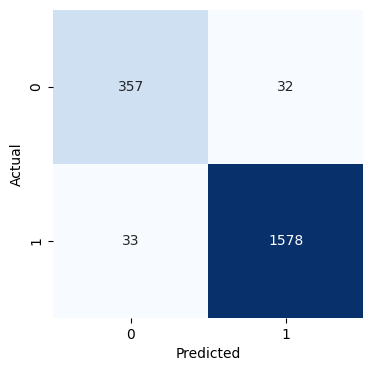

In [303]:
plt.figure(figsize = (4,4))
sns.heatmap( conf_matrix , annot = True , fmt = 'd',cmap = 'Blues',cbar = False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Conclusion

The Support Vector Classifier (SVC) demonstrates excellent performance with high precision, recall, and F1-score for both classes (0 and 1). The overall accuracy of 97% indicates the model's effectiveness in making accurate predictions. The weighted averages, considering the class distribution, reinforce the strong overall performance of the SVC. The model effectively handles both positive and negative instances, showcasing its robustness in classification tasks.

1. **Positive Aspects:**
   - The airline generally receives positive reviews and provides good services to passengers.
   - The food and beverages offered are considered good, though there is room for improvement in terms of quality and food safety.
   - The overall ratings fall in the range of 7 to 10, indicating a generally positive sentiment.

2. **Areas for Improvement:**
   - The comfort of seats is highlighted as an area that needs improvement. Passengers express dissatisfaction with the current seating conditions.
   - The cabin quality is perceived as subpar, suggesting a need for enhancements in the airline's cabin amenities.
   - Ground handling, including baggage handling, customer support, and service at the ground, receives lower ratings, indicating a necessity for improvement in these areas.

3. **Opportunities and Recommendations:**
   - The data suggests a low number of solo travelers. There is an opportunity for the airline to attract more solo travelers by offering special promotions and facilities tailored to their needs.
   - To enhance overall ratings, the airline should focus on addressing the identified weak points and striving for excellence in all aspects of the passenger experience.

4. **Data Quality and Maintenance:**
   - The dataset used for analysis has limitations, including a small size and numerous missing values. It is crucial to address these data quality issues for more accurate and comprehensive insights.
   - Continuous monitoring and maintenance of data integrity are necessary to ensure the reliability of future analyses.

In summary, while the airline is generally performing well, there are specific areas that require attention and improvement to enhance the overall passenger experience and satisfaction. Addressing these weaknesses can contribute to higher ratings, increased customer loyalty, and

a more competitive position in the market. Additionally, ongoing efforts in data management and collection should be undertaken to ensure the availability of a robust dataset for future analyses and decision-making.

as per the data observations the airlines are doing well.
The data is too less and have lots of null values init . Need to be maintained well.